### Implementation of FVBAE on MNIST

A classic dataset in the field of machine learning is the MNIST dataset, a collection of 60,000 labeled handwritten digits. In the paper Auto-Encoding Variational Bayes by Kingma and Welling, the MNIST data set is used to illustrate the variational bayesian autoencoder's effectiveness. Below is an example of how our implementation of the algorithm in FVBAE can be used to replicate their experiment.

The dataset is first loaded from Keras. Then, it is preprocessed and the function is employed. To be consistent with the architecture used in their paper, the model is specified to have 500 hidden units. Training of the algorithm used a minibatch size of 100, and Adagrad was the chosen optimizer.

In [6]:
### Importing the data
from keras.datasets import mnist

(Xtrain, ytrain), (Xtest, ytest) = mnist.load_data()

In [7]:
Xtrain = Xtrain.reshape(60000, 784)
Xtrain = Xtrain / 255

In [11]:
import fvbae
import keras
import matplotlib.pyplot as plt
import numpy as np

In [19]:
optimizer = keras.optimizers.adagrad(lr = 0.01)

autoencoder, encoder, decoder = fvbae.vae(Xtrain, nndim = 100, latentdim = int(2), samplestd = 1.0,
        epochs = int(10), batch_size = int(100))

Epoch 1/10
60000/60000 [==============================] - 12s 200us/step - loss: 208.4928
Epoch 2/10
60000/60000 [==============================] - 10s 175us/step - loss: 178.4877
Epoch 3/10
60000/60000 [==============================] - 9s 153us/step - loss: 169.9497
Epoch 4/10
60000/60000 [==============================] - 9s 155us/step - loss: 166.2909
Epoch 5/10
60000/60000 [==============================] - 13s 222us/step - loss: 164.03400s -
Epoch 6/10
60000/60000 [==============================] - 13s 224us/step - loss: 162.4419
Epoch 7/10
60000/60000 [==============================] - 10s 165us/step - loss: 161.2483
Epoch 8/10
60000/60000 [==============================] - 14s 227us/step - loss: 160.3336
Epoch 9/10
60000/60000 [==============================] - 14s 230us/step - loss: 159.5920
Epoch 10/10
60000/60000 [==============================] - 14s 230us/step - loss: 158.9992


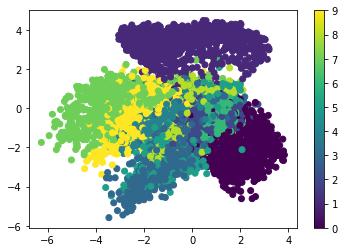

In [20]:
Xtest = Xtest.reshape((len(Xtest), np.prod(Xtest.shape[1:])))
x_test_encoded = encoder.predict(Xtest/255, batch_size = int(100))
plt.scatter(x_test_encoded[:,0], x_test_encoded[:,1], c=ytest)
plt.colorbar()
plt.show()

The above visualization depicts the test observations encoded into latent space. Colors represent digit classifications. Thus, based on the clusters formed, we can see that in latent space structurally close digits are represented closer to one another.

The variation bayesian autoencoder is also a generative model. Thus, if we sample latent points across a grid, we can generate digits for each point. 

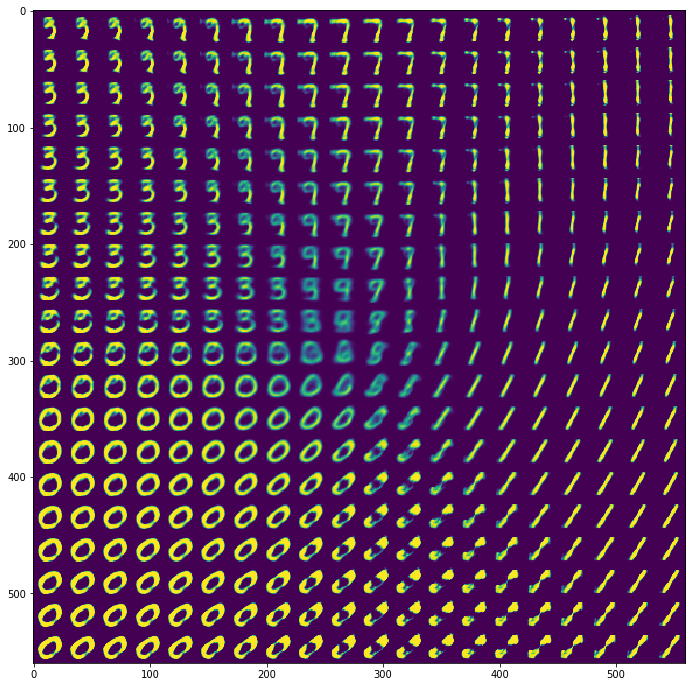

In [37]:
### This code for plotting has been borrowed from https://blog.keras.io/building-autoencoders-in-keras.html

n = 20  
pix_size = 28
grid = np.zeros((digit_size * n, digit_size * n))
grid_x = np.linspace(-10, 10, n)
grid_y = np.linspace(-10, 10, n)

for i, x in enumerate(grid_x):
    for j, y in enumerate(grid_y):
        latent = np.array([[x, y]])
        decoded = decoder.predict(latent)
        digit = decoded[0]
        digit = digit.reshape(pix_size, pix_size)
        grid[i * pix_size: (i + 1) * pix_size,
               j * pix_size: (j + 1) * pix_size] = digit

plt.figure(figsize=(12, 12))
plt.imshow(grid)
plt.show()